In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
train = pd.read_csv('datasets/loan-train.csv')
test = pd.read_csv('datasets/loan-train.csv')

In [6]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Pre-processing

In [7]:
train['source']='train'
test['source']='test'

dataset = pd.concat([train,test], ignore_index = True)
print("Train dataset shape:",train.shape)
print("Test dataset shape:",test.shape)
print("Concatenated dataset shape:",dataset.shape)

Train dataset shape: (614, 14)
Test dataset shape: (614, 14)
Concatenated dataset shape: (1228, 14)


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            1228 non-null   object 
 1   Gender             1202 non-null   object 
 2   Married            1222 non-null   object 
 3   Dependents         1198 non-null   object 
 4   Education          1228 non-null   object 
 5   Self_Employed      1164 non-null   object 
 6   ApplicantIncome    1228 non-null   int64  
 7   CoapplicantIncome  1228 non-null   float64
 8   LoanAmount         1184 non-null   float64
 9   Loan_Amount_Term   1200 non-null   float64
 10  Credit_History     1128 non-null   float64
 11  Property_Area      1228 non-null   object 
 12  Loan_Status        1228 non-null   object 
 13  source             1228 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 134.4+ KB


In [9]:
dataset.isnull().sum()

Loan_ID                0
Gender                26
Married                6
Dependents            30
Education              0
Self_Employed         64
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            44
Loan_Amount_Term      28
Credit_History       100
Property_Area          0
Loan_Status            0
source                 0
dtype: int64

In [10]:
print(dataset['Gender'].unique())
print(dataset['Married'].unique())
print(dataset['Dependents'].unique())
print(dataset['Self_Employed'].unique())
print(dataset['LoanAmount'].unique())
print(dataset['Loan_Amount_Term'].unique())
print(dataset['Credit_History'].unique())

['Male' 'Female' nan]
['No' 'Yes' nan]
['0' '1' '2' '3+' nan]
['No' 'Yes' nan]
[ nan 128.  66. 120. 141. 267.  95. 158. 168. 349.  70. 109. 200. 114.
  17. 125. 100.  76. 133. 115. 104. 315. 116. 112. 151. 191. 122. 110.
  35. 201.  74. 106. 320. 144. 184.  80.  47.  75. 134.  96.  88.  44.
 286.  97. 135. 180.  99. 165. 258. 126. 312. 136. 172.  81. 187. 113.
 176. 130. 111. 167. 265.  50. 210. 175. 131. 188.  25. 137. 160. 225.
 216.  94. 139. 152. 118. 185. 154.  85. 259. 194.  93. 370. 182. 650.
 102. 290.  84. 242. 129.  30. 244. 600. 255.  98. 275. 121.  63. 700.
  87. 101. 495.  67.  73. 260. 108.  58.  48. 164. 170.  83.  90. 166.
 124.  55.  59. 127. 214. 240.  72.  60. 138.  42. 280. 140. 155. 123.
 279. 192. 304. 330. 150. 207. 436.  78.  54.  89. 143. 105. 132. 480.
  56. 159. 300. 376. 117.  71. 490. 173.  46. 228. 308. 236. 570. 380.
 296. 156. 103.  45.  65.  53. 360.  62. 218. 178. 239. 405. 148. 190.
 149. 153. 162. 230.  86. 234. 246. 500. 186. 119. 107. 209. 208. 243

In [11]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace=True)
dataset['Married'].fillna(dataset['Married'].mode()[0], inplace=True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0], inplace=True)
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0], inplace=True)
dataset['LoanAmount'].fillna(dataset['LoanAmount'].median(), inplace=True)
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].median(), inplace=True)
dataset['Credit_History'].fillna(dataset['Credit_History'].median(), inplace=True)

In [12]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
source               0
dtype: int64

In [13]:
print(len(dataset['Gender'].unique()))
print(len(dataset['Married'].unique()))
print(len(dataset['Dependents'].unique()))
print(len(dataset['Self_Employed'].unique()))
print(len(dataset['LoanAmount'].unique()))
print(len(dataset['Loan_Amount_Term'].unique()))
print(len(dataset['Credit_History'].unique()))
print(len(dataset['Loan_ID'].unique()))
print(len(dataset['Education'].unique()))
print(len(dataset['ApplicantIncome'].unique()))
print(len(dataset['CoapplicantIncome'].unique()))
print(len(dataset['source'].unique()))

2
2
4
2
203
10
2
614
2
505
287
2


In [14]:
#Divide into test and train:
train = dataset.loc[dataset['source']=="train"]
test = dataset.loc[dataset['source']=="test"]
#Drop unnecessary columns:
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

c:\users\dell  pc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
categorical_d = {'Y': 1, 'N': 0}
dataset['Loan_Status'] = dataset['Loan_Status'].map(categorical_d)

<AxesSubplot:>

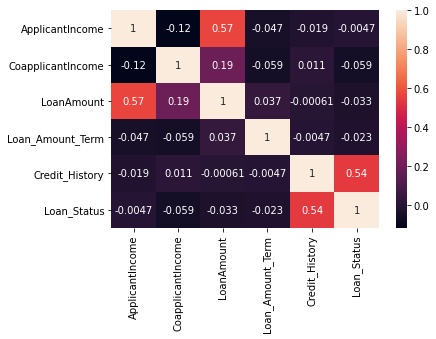

In [18]:
sns.heatmap(dataset.corr(), annot = True)

# Data Visualization

<AxesSubplot:title={'center':'Loan Status Bar Plot'}, xlabel='Loan Status Y - Yes or N- No', ylabel='Loan Status Count'>

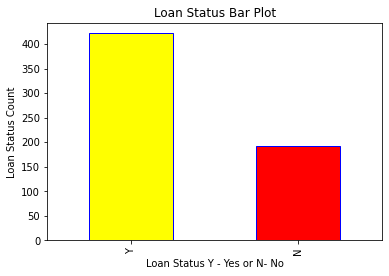

In [83]:
plt.title('Loan Status Bar Plot')
plt.xlabel('Loan Status Y - Yes or N- No')
plt.ylabel('Loan Status Count')

train['Loan_Status'].value_counts().plot.bar(color=['yellow', 'red'],edgecolor='blue')

<AxesSubplot:title={'center':'Credit History'}>

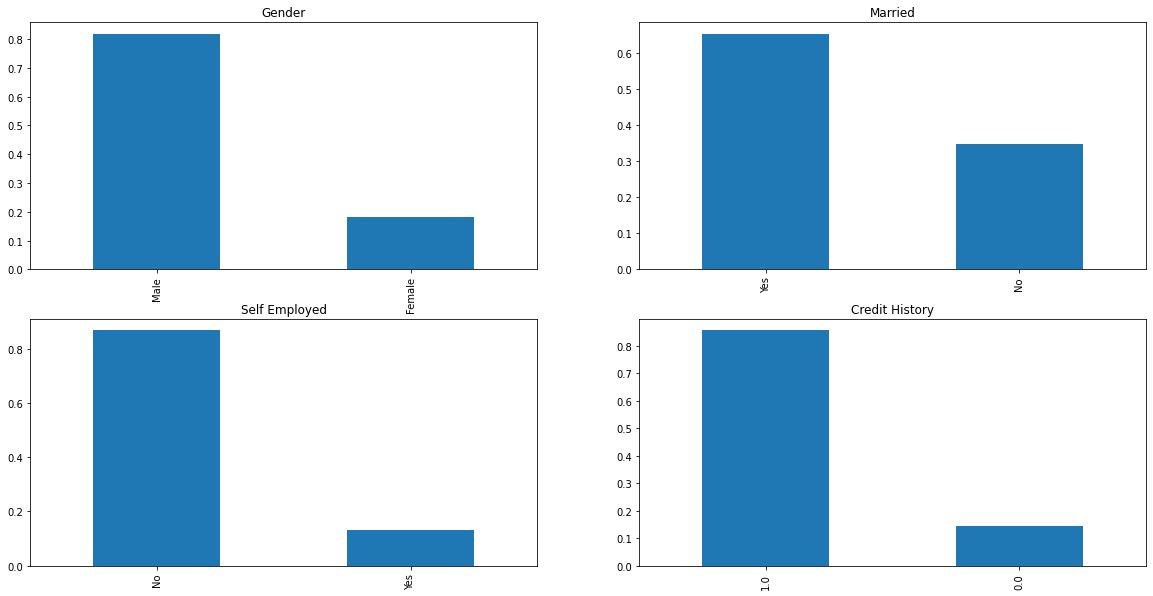

In [84]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.subplot(2,2,2)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(2,2,3)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self Employed')
plt.subplot(2,2,4)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit History')

<AxesSubplot:xlabel='Credit_History'>

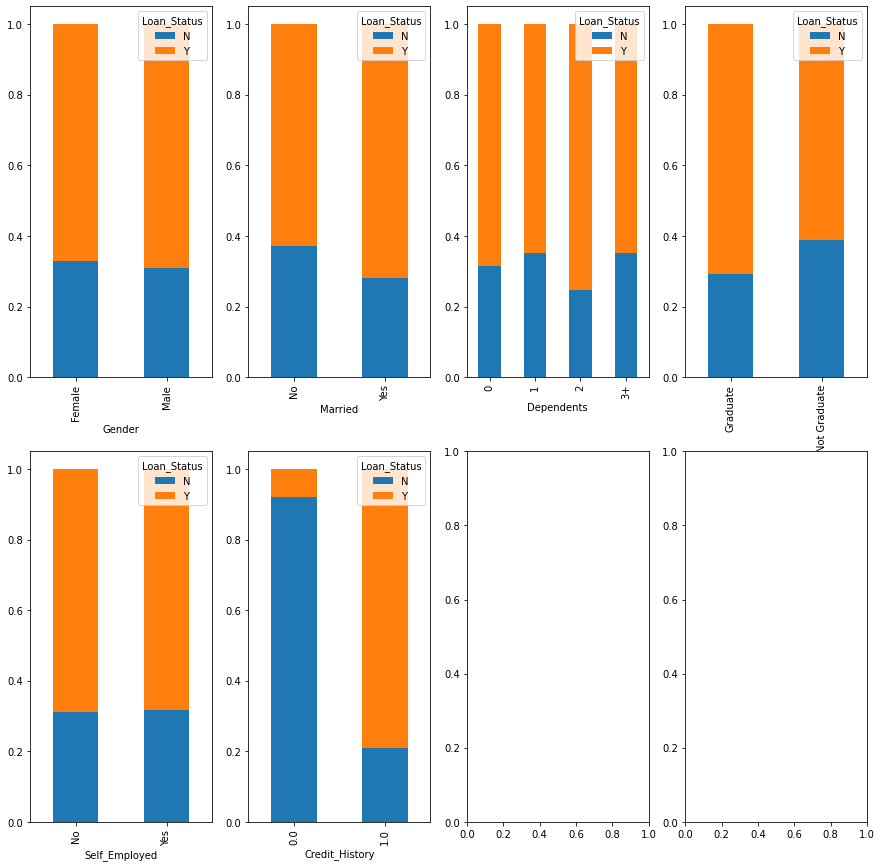

In [124]:
fig, ax = plt.subplots(2,4,figsize = (15,15))
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax[0,0])

Married = pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[0,1])

Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[0,2])

Education = pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=ax[0,3])

Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[1,0])

Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[1,1])


In [86]:
X=train.drop(["Loan_Status",'Loan_ID'],axis=1)
y=train["Loan_Status"]

categorical_d = {'Male': 1, 'Female': 0}
X['Gender'] = X['Gender'].map(categorical_d)

categorical_d = {'Yes': 1, 'No': 0}
X['Married'] = X['Married'].map(categorical_d)
X['Self_Employed'] = X['Self_Employed'].map(categorical_d)

categorical_d = {'Graduate': 1, 'Not Graduate': 0}
X['Education'] = X['Education'].map(categorical_d)

X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0


In [87]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()

X['Dependents'] = le.fit_transform(X['Dependents'])

X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0


In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [90]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Fitting the Dataset to various models

# Linear Regression

In [91]:
logistic_Regression = LogisticRegression(max_iter=1000,random_state=0)
logistic_Regression.fit(x_train,y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [92]:
y_pred = logistic_Regression.predict(x_test)

In [93]:
log = accuracy_score(y_pred,y_test)*100

In [94]:
print(log)

83.24324324324324


In [95]:
print(confusion_matrix(y_pred,y_test))

[[ 22   2]
 [ 29 132]]


In [96]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           N       0.43      0.92      0.59        24
           Y       0.99      0.82      0.89       161

    accuracy                           0.83       185
   macro avg       0.71      0.87      0.74       185
weighted avg       0.91      0.83      0.85       185



# KNN

In [97]:
knn = KNeighborsClassifier(n_neighbors=200)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=200)

In [98]:
pred_knn = knn.predict(x_test)

In [99]:
KNN = accuracy_score(pred_knn,y_test)*100

In [100]:
print(confusion_matrix(pred_knn,y_test))

[[  0   0]
 [ 51 134]]


In [101]:
print(classification_report(pred_knn,y_test))

              precision    recall  f1-score   support

           N       0.00      0.00      0.00         0
           Y       1.00      0.72      0.84       185

    accuracy                           0.72       185
   macro avg       0.50      0.36      0.42       185
weighted avg       1.00      0.72      0.84       185



C:\Users\Dell  PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell  PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell  PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [102]:
error=[]
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred1=knn.predict(x_test)
    error.append(np.mean(pred1!=y_test))
print(error)

[0.43243243243243246, 0.4864864864864865, 0.40540540540540543, 0.42162162162162165, 0.372972972972973, 0.3891891891891892, 0.3675675675675676, 0.372972972972973, 0.31891891891891894, 0.35135135135135137, 0.3081081081081081, 0.34594594594594597, 0.32432432432432434, 0.33513513513513515, 0.32432432432432434, 0.31351351351351353, 0.2972972972972973, 0.32972972972972975, 0.3027027027027027, 0.31351351351351353, 0.2972972972972973, 0.31351351351351353, 0.2972972972972973, 0.2972972972972973, 0.2864864864864865, 0.2918918918918919, 0.2810810810810811, 0.2864864864864865, 0.2810810810810811, 0.2810810810810811, 0.2810810810810811, 0.2864864864864865, 0.2918918918918919, 0.2864864864864865, 0.2810810810810811, 0.2810810810810811, 0.2756756756756757, 0.2810810810810811, 0.2756756756756757, 0.2756756756756757, 0.2756756756756757, 0.2756756756756757, 0.2756756756756757, 0.2756756756756757, 0.2756756756756757, 0.2756756756756757, 0.2756756756756757, 0.2756756756756757, 0.2756756756756757]


Text(0, 0.5, 'error rate')

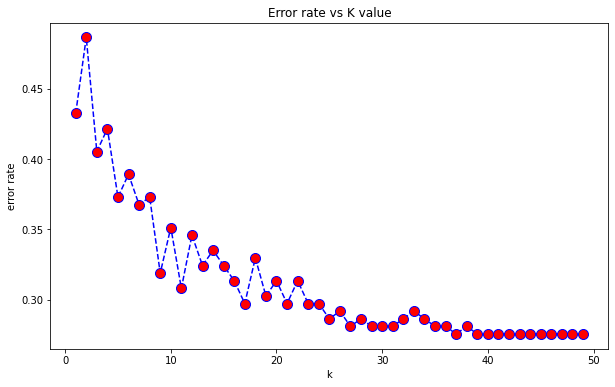

In [103]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error,color='blue',linestyle='dashed',marker = 'o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs K value')
plt.xlabel('k')
plt.ylabel('error rate')

# Naive-Bayes

In [104]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [105]:
pred_gnb = gnb.predict(x_test)

In [106]:
GNB = accuracy_score(pred_gnb,y_test)*100

In [107]:
print(confusion_matrix(pred_gnb,y_test))

[[ 22   4]
 [ 29 130]]


In [108]:
print(classification_report(pred_gnb,y_test))

              precision    recall  f1-score   support

           N       0.43      0.85      0.57        26
           Y       0.97      0.82      0.89       159

    accuracy                           0.82       185
   macro avg       0.70      0.83      0.73       185
weighted avg       0.89      0.82      0.84       185



# SVM

In [109]:
svc = SVC()
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)

In [110]:
SVC = accuracy_score(pred_svc,y_test)*100

In [111]:
print(confusion_matrix(pred_svc,y_test))

[[  0   0]
 [ 51 134]]


In [112]:
print(classification_report(pred_svc,y_test))

              precision    recall  f1-score   support

           N       0.00      0.00      0.00         0
           Y       1.00      0.72      0.84       185

    accuracy                           0.72       185
   macro avg       0.50      0.36      0.42       185
weighted avg       1.00      0.72      0.84       185



C:\Users\Dell  PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell  PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell  PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

# Decision Tree-Entropy

In [113]:
dtree_en = DecisionTreeClassifier(criterion='entropy',splitter='random',max_leaf_nodes=5,min_samples_leaf=10,max_depth=3)

In [114]:
clf = dtree_en.fit(x_train,y_train)

In [115]:
pred_dt = clf.predict(x_test)

In [116]:
DTREE = accuracy_score(pred_dt,y_test)*100

In [117]:
cm=confusion_matrix(y_test,pred_dt)
print(cm)
print(classification_report(y_test,pred_dt))

[[ 21  30]
 [  2 132]]
              precision    recall  f1-score   support

           N       0.91      0.41      0.57        51
           Y       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185



In [118]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
614,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Y
615,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N
616,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y
617,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y
618,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y


In [119]:
Xt = test.drop(["Loan_Status","Loan_ID"],axis=1)
categorical_d = {'Male': 1, 'Female': 0}
Xt['Gender'] = Xt['Gender'].map(categorical_d)

categorical_d = {'Yes': 1, 'No': 0}
Xt['Married'] = Xt['Married'].map(categorical_d)
Xt['Self_Employed'] = Xt['Self_Employed'].map(categorical_d)

categorical_d = {'Graduate': 1, 'Not Graduate': 0}
Xt['Education'] = Xt['Education'].map(categorical_d)

le = LabelEncoder()

Xt['Dependents'] = le.fit_transform(Xt['Dependents'])

Xt

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
614,1,0,0,1,0,5849,0.0,128.0,360.0,1.0
615,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0
616,1,1,0,1,1,3000,0.0,66.0,360.0,1.0
617,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0
618,1,0,0,1,0,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1223,0,0,0,1,0,2900,0.0,71.0,360.0,1.0
1224,1,1,3,1,0,4106,0.0,40.0,180.0,1.0
1225,1,1,1,1,0,8072,240.0,253.0,360.0,1.0
1226,1,1,2,1,0,7583,0.0,187.0,360.0,1.0


In [120]:
test_pred = logistic_Regression.predict(Xt)

In [121]:
test["Loan_Status"] = test_pred

<ipython-input-121-5461241fe85f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Loan_Status"] = test_pred


In [122]:
print(test[["Loan_ID","Loan_Status"]])

       Loan_ID Loan_Status
614   LP001002           Y
615   LP001003           Y
616   LP001005           Y
617   LP001006           Y
618   LP001008           Y
...        ...         ...
1223  LP002978           Y
1224  LP002979           Y
1225  LP002983           Y
1226  LP002984           Y
1227  LP002990           N

[614 rows x 2 columns]
